# Naïve Bayes Classifier
In this notebook, we will be training a Naive Bayes model for a COVID-19 outcome prediction, the model will be trained on the dataset provided in the [data](../data) directory.
Upon training, the model should be able to predict whether a person is going to recover from their CoronaVirus symptoms or not.
The trained model will be saved in the [models](../models) directory.

### **1. Setup and Libraries**
Useful libraries and setup for the notebook

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# For model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

# For saving the model
import joblib

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Data Loading and Exploration**
Loading and exploring the dataset.

In [3]:
data_path = '../data/data.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


### **3. Data preprocessing**
Even though the data is preprocessed, it's essential to ensure that all features are correctly formatted and handle any potential issues.

In [6]:
# Drop the 'Unnamed: 32' column if it exists
if 'Unnamed: 0' in df.columns:
	df.drop('Unnamed: 0', axis=1, inplace=True)

# Split the data into features and target
X = df.drop('result', axis=1)
y = df['result']

# Display feature names
print("Feature columns:")
print(X.columns)

Feature columns:
Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos'],
      dtype='object')


### **4. Feature Scaling**
Scaling the features to ensure that all features contribute equally to the model.
To [center the data](https://en.wikipedia.org/wiki/Standard_score) (make it have zero mean and unit standard error), we subtract the mean and then divide the result by the standard deviation:
$$
x' = \frac{x-\mu}{\sigma}
$$

In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
X_scaled.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,0.698221,-1.15245,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,0.621646,-1.15245,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,1.540540,-1.15245,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,1.004519,-1.15245,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,1.004519,-1.15245,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


### **5. Splitting the dataset**
Dividing the data into training, validation, and testing sets: 70% training, 15% validation, and 15% testing.

In [9]:
# Split the data into 'Training' and 'Temp' sets, Temp set will be further split into 'Validation' and 'Test' sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split the 'Temp' set into 'Validation' and 'Test' sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the sets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 604
Validation set size: 129
Test set size: 130


### **6. Model Training**
We'll use Scikit-Learn's `GaussianNB` to train the model.

In [10]:
# Initialize the Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

GaussianNB()

### **7. Model Evaluation**
Evaluating the model using the validation set.

Precision: 0.14285714285714285
Recall: 1.0
F1 Score: 0.25
ROC AUC Score: 0.6637931034482758
Confusion Matrix:


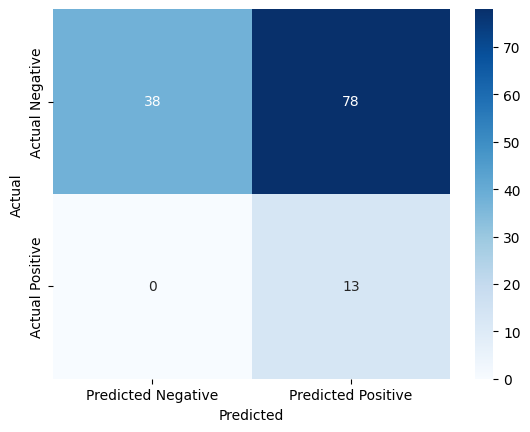


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.49       116
           1       0.14      1.00      0.25        13

    accuracy                           0.40       129
   macro avg       0.57      0.66      0.37       129
weighted avg       0.91      0.40      0.47       129



In [ ]:
# Predict on the validation data
y_val_pred = gnb.predict(X_val)
y_val_proba = gnb.predict_proba(X_val)[:, 1] # Probability of positive class

# Calculate evaluation metrics
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)

# Display the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

The model has a higher recall value, which is great because we care more about False Negatives than False Positives in our dataset. <br />
(We don't want to predict that a patient will not die when they will.)

### **8. ROC Curve visualizationing**
Visualizing the ROC curve to evaluate the model's performance.

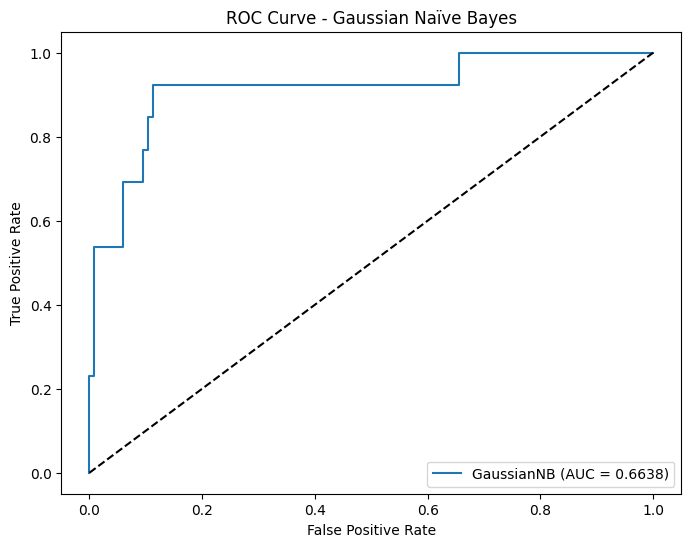

In [18]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'GaussianNB (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naïve Bayes')
plt.legend(loc='lower right')
plt.show()

### **9. Model Testing**
Testing the model using the testing set.

Test Set Evaluation:
Precision: 0.1650
Recall:    0.8947
F1-Score:  0.2787
ROC AUC:   0.8274
Confusion Matrix:


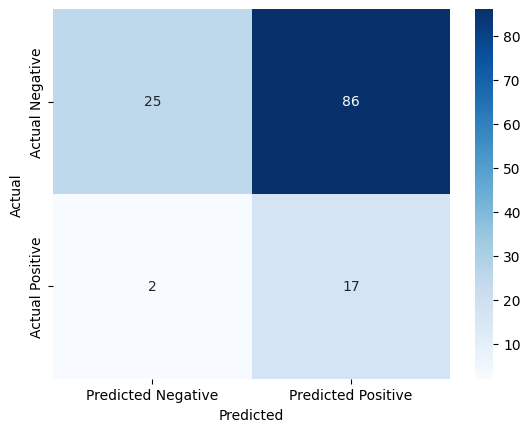


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.23      0.36       111
           1       0.17      0.89      0.28        19

    accuracy                           0.32       130
   macro avg       0.55      0.56      0.32       130
weighted avg       0.81      0.32      0.35       130



In [19]:
# Predict on the test set
y_test_pred = gnb.predict(X_test)
y_test_proba = gnb.predict_proba(X_test)[:,1]

# Calculate evaluation metrics
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

print("Test Set Evaluation:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall:    {recall_test:.4f}")
print(f"F1-Score:  {f1_test:.4f}")
print(f"ROC AUC:   {roc_auc_test:.4f}")

# Print the confusion matrix and classification report
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

### **10. Saving the model**
Saving the trained model to be used in the main notebook for evaluating the model's performance vs other models.

In [20]:
# Define the directory to save the model
model_dir = 'models/naive_bayes/'

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, 'naive_bayes_model.joblib')
joblib.dump(gnb, model_path)
print(f"Model saved to {model_path}")

# Also, save the scaler to ensure consistent preprocessing
scaler_path = os.path.join(model_dir, 'scaler.joblib')
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

Model saved to models/naive_bayes/naive_bayes_model.joblib
Scaler saved to models/naive_bayes/scaler.joblib
